En la industria de las telecomunicaciones, la retención de clientes es un desafío clave para
las empresas. La fuga de clientes, también conocida como churn, es un problema que puede
tener un impacto significativo en los ingresos y la reputación de una empresa. Anticiparse a
la fuga de clientes y tomar medidas preventivas para retenerlos se ha convertido en una
prioridad estratégica. En este contexto, el objetivo de esta tarea es utilizar técnicas de
machine learning para desarrollar un modelo que pueda predecir la probabilidad de fuga de
clientes en una empresa de telecomunicaciones.
El objetivo principal de este proyecto es utilizar un enfoque basado en machine learning para
construir un modelo predictivo de fuga de clientes. El modelo será capaz de clasificar a los
clientes como "fugados" o "no fugados" en función de un conjunto de variables relevantes. El
objetivo es proporcionar a la empresa de telecomunicaciones una herramienta eficaz para
identificar a los clientes en riesgo de abandonar sus servicios, lo que permitirá tomar
medidas proactivas para retenerlos.
Para lograr este objetivo, se utilizará un conjunto de datos históricos de la base de datos
Telco-Customer-Churn.csv que contiene información detallada sobre los clientes como la
duración de la suscripción, el uso de servicios, los tipos de servicios contratados, el historial
de pagos y más. Estos datos servirán como base para entrenar y validar el modelo
predictivo. Se emplearán diversas técnicas de preprocesamiento de datos, selección de
características y entrenamiento de modelos de clasificación como árboles de decisión,
Naive Bayes o regresión logística, con el fin de obtener el mejor rendimiento posible.
El resultado final será un modelo de clasificación preciso y confiable, capaz de predecir la
probabilidad de fuga de clientes en la empresa de telecomunicaciones. Este modelo
permitirá a la empresa identificar y priorizar a los clientes en riesgo, lo que a su vez facilitará
la implementación de estrategias específicas de retención de clientes. Además, se espera
que el proyecto proporcione una comprensión más profunda de los factores y las variables
que influyen en la fuga de clientes en la industria de las telecomunicaciones.
En resumen, este proyecto tiene como objetivo principal aplicar técnicas de machine
learning para desarrollar un modelo predictivo de fuga de clientes en la industria de las
telecomunicaciones. El modelo resultante permitirá identificar a los clientes en riesgo de
abandonar los servicios de la empresa y tomar acciones preventivas para retenerlos

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

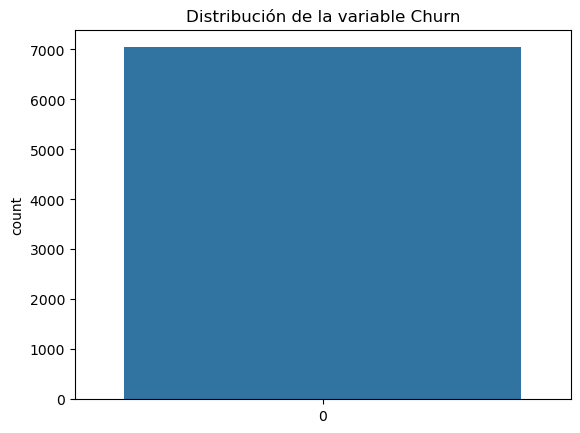

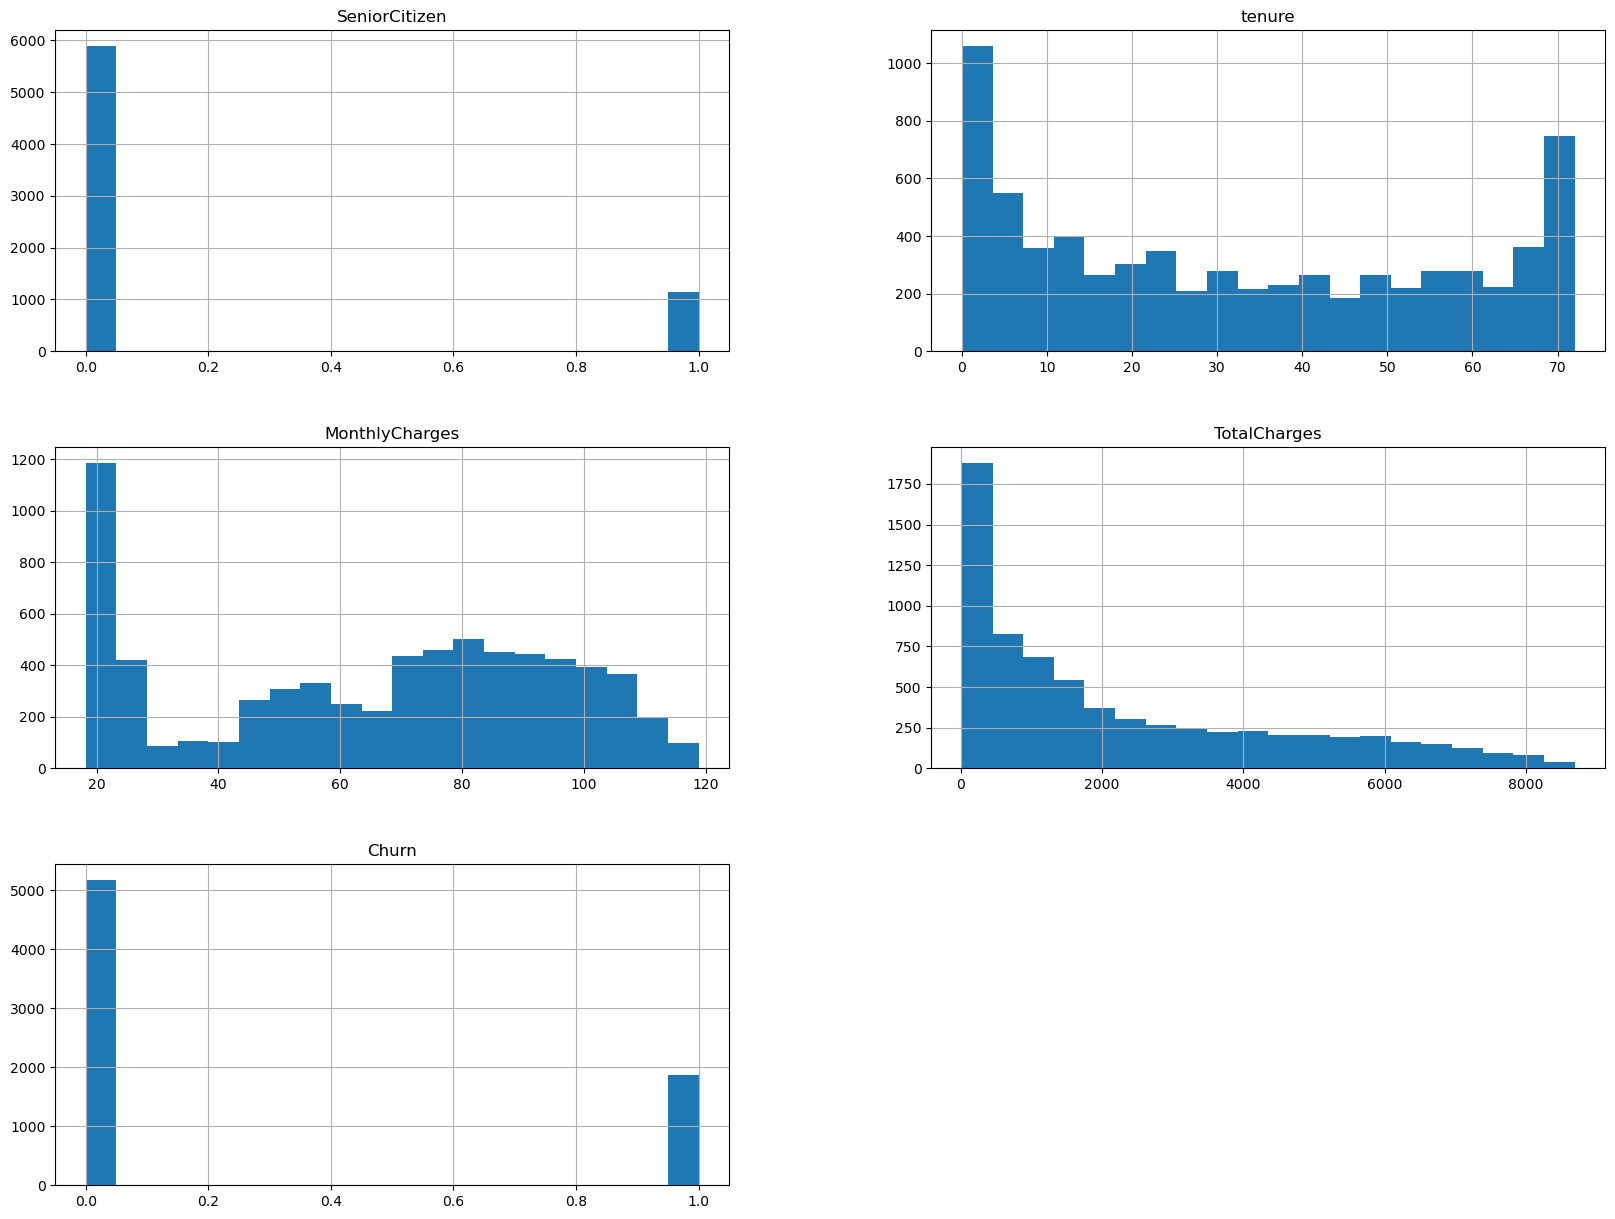

In [4]:
#1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#cargamos el dataset
data = pd.read_excel('Telco-Customer-Churn.xlsx')

#resumir las primeras filas para explorar el dataset
print(data.head())

#verificar información general del dataset
print(data.info())

#analisis estadistico
print(data.describe())

#parseamos la columna Churn de 'Yes'y 'No' a 1-0
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

#verificamos q se haya realizado correctamente
print(data['Churn'].value_counts())


#revisamos la distribución de la variable objetivo Churn
print(data['Churn'].value_counts())

#grafico de barras de la variable objetivo
sns.countplot(data['Churn'])
plt.title('Distribución de la variable Churn')
plt.show()

#distribuicion de caracteristicas numericas
data.hist(bins=20, figsize=(20, 15))
plt.show()




Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')
SeniorCitizen      0
tenure             0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64


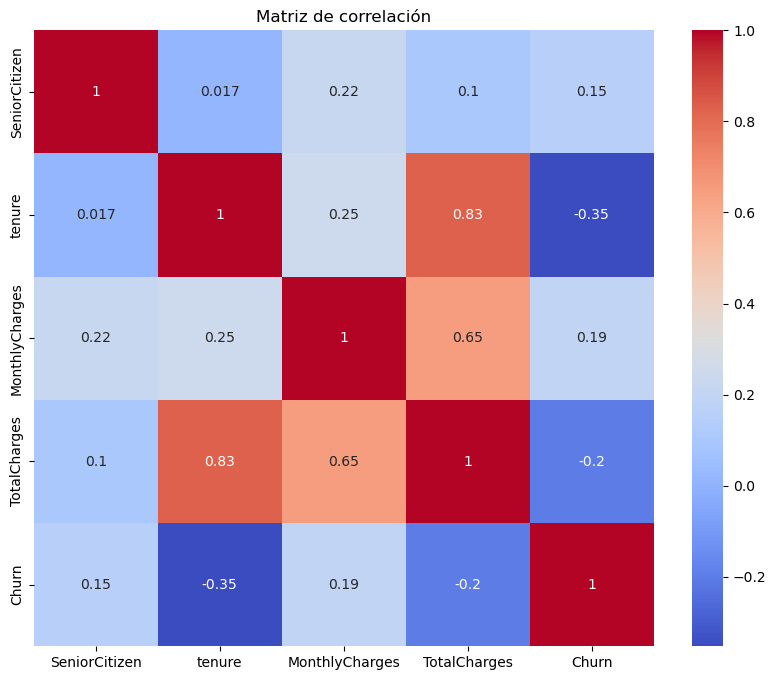

In [7]:
#ahora solo seleccionamos las columnas numericas
numeric_data = data.select_dtypes(include=[float, int])

#imprimiremos las columnas que seleeccionamos arriba
print(numeric_data.columns)

#revisaremos si quedan NaN o datos incorrectos
print(numeric_data.isnull().sum())

#por ultimo creamos la matriz
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()


In [8]:
#2 preprocesamiento y limpieza de los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#eliminamos columnas que no necesitamos
data = data.drop(columns=['customerID'])

#convertimos las variables categoricas a numericas (Label Encoding para la variable objetivo)
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

#One-hot encoding para las variables categoricas
data = pd.get_dummies(data)

#normalizamos variables numericas
scaler = StandardScaler()
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

#verificamos valores faltantes
print(data.isnull().sum())

#eliminamos e imputamos valores faltantes (si existiesen)
data = data.dropna()  #ejemplo simple, se puede usar imputacion tambien


SeniorCitizen                               0
tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
gender_Female                               0
gender_Male                                 0
Partner_No                                  0
Partner_Yes                                 0
Dependents_No                               0
Dependents_Yes                              0
PhoneService_No                             0
PhoneService_Yes                            0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                

In [12]:
#3 division de los datos
#separamos las caracteristicas y variable objetivo
X = data.drop(columns=['Churn'])
y = data['Churn']

#dividimos el dataset en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


In [13]:
#4 entrenamiento de algoritmos y optimizacion de hiperparametros
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

#entrenamos un arbol de decision
tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {'max_depth': [3, 5, 7, 10]}
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

#entrenamos Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

#entrenamos regresion logistica
logreg = LogisticRegression(random_state=42, max_iter=1000)
param_grid_logreg = {'C': [0.1, 1, 10]}
grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5)
grid_logreg.fit(X_train, y_train)

#ahora debemos mostrar los mejores hiperparametros 
print("Mejor hiperparametro para arbol de decision:", grid_tree.best_params_)
print("Mejor hiperparametro para regresion logistica:", grid_logreg.best_params_)


Mejor hiperparametro para arbol de decision: {'max_depth': 3}
Mejor hiperparametro para regresion logistica: {'C': 10}


In [15]:
#5 evaluamos el metodo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Predicciones
y_pred_tree = grid_tree.predict(X_test)
y_pred_nb = nb.predict(X_test)
y_pred_logreg = grid_logreg.predict(X_test)

# Evaluación para cada modelo
def evaluate_model(y_test, y_pred, model_name):
    print(f"evaluacion para {model_name}")
    print(f"precision: {accuracy_score(y_test, y_pred):.4f}")
    print(f"sensibilidad: {recall_score(y_test, y_pred):.4f}")
    print(f"valor F1: {f1_score(y_test, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_pred):.4f}")
    print(confusion_matrix(y_test, y_pred))

#evualuamos el arbol de decisicion
evaluate_model(y_test, y_pred_tree, "Arbol de DecisiOn")

#evaluamos Naive Bayes
evaluate_model(y_test, y_pred_nb, "Naive Bayes")
               
#evaluamos la regresion logistica               
evaluate_model(y_test, y_pred_logreg, "Regresion Logistica")


evaluacion para Arbol de DecisiOn
precision: 0.7848
sensibilidad: 0.3565
valor F1: 0.4684
ROC-AUC: 0.6482
[[1456   93]
 [ 361  200]]
evaluacion para Naive Bayes
precision: 0.6844
sensibilidad: 0.8342
valor F1: 0.5843
ROC-AUC: 0.7322
[[976 573]
 [ 93 468]]
evaluacion para Regresion Logistica
precision: 0.8043
sensibilidad: 0.5615
valor F1: 0.6040
ROC-AUC: 0.7268
[[1382  167]
 [ 246  315]]
